In [34]:
import pandas as pd
import numpy as np
from pandas import Series,DataFrame
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [79]:
covid_data = pd.read_csv("Provincial_Daily_Totals.csv")

In [80]:
covid_data.shape

(5115, 21)

In [81]:
covid_data.head(10)

,OBJECTID,Province,Abbreviation,DailyTotals,SummaryDate,Date,TotalCases,TotalRecovered,DailyRecovered,TotalDeaths,...,TotalTested,DailyTested,TotalActive,DailyActive,TotalHospitalized,DailyHospitalized,TotalICU,DailyICU,TotalVaccinated,DailyVaccinated
0,1,ALBERTA,AB,0,2020/01/25 12:00:00+00,1/25/2020,0,0,0,0,...,0,0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2,NWT,NT,0,2020/01/25 12:00:00+00,1/25/2020,0,0,0,0,...,0,0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,3,YUKON,YT,0,2020/01/25 12:00:00+00,1/25/2020,0,0,0,0,...,0,0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,4,SASKATCHEWAN,SK,0,2020/01/25 12:00:00+00,1/25/2020,0,0,0,0,...,0,0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,5,PEI,PE,0,2020/01/25 12:00:00+00,1/25/2020,0,0,0,0,...,0,0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
5,6,ONTARIO,ON,1,2020/01/25 12:00:00+00,1/25/2020,1,0,0,0,...,0,0,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN
6,7,NEW BRUNSWICK,NB,0,2020/01/25 12:00:00+00,1/25/2020,0,0,0,0,...,0,0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
7,8,REPATRIATED,RC,0,2020/01/25 12:00:00+00,1/25/2020,0,0,0,0,...,0,0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
8,9,NOVA SCOTIA,NS,0,2020/01/25 12:00:00+00,1/25/2020,0,0,0,0,...,0,0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
9,10,NL,NL,0,2020/01/25 12:00:00+00,1/25/2020,0,0,0,0,...,0,0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [83]:
# many null values in dataset
covid_data.isnull().sum()

OBJECTID                0
Province                0
Abbreviation            0
DailyTotals             0
SummaryDate             0
Date                    0
TotalCases              0
TotalRecovered          0
DailyRecovered          0
TotalDeaths             0
DailyDeaths             0
TotalTested             0
DailyTested             0
TotalActive             0
DailyActive             8
TotalHospitalized    1125
DailyHospitalized    1125
TotalICU             1125
DailyICU             1125
TotalVaccinated      5112
DailyVaccinated      5112
dtype: int64

In [82]:
covid_data.tail(10)

,OBJECTID,Province,Abbreviation,DailyTotals,SummaryDate,Date,TotalCases,TotalRecovered,DailyRecovered,TotalDeaths,...,TotalTested,DailyTested,TotalActive,DailyActive,TotalHospitalized,DailyHospitalized,TotalICU,DailyICU,TotalVaccinated,DailyVaccinated
5105,5477,BRITISH COLUMBIA,BC,485,2020/12/30 12:00:00+00,12/30/2020,51300,41681,506,893,...,1451775,6785,7551,-29.0,379.0,6.0,77.0,-3.0,NaN,NaN
5106,5478,NOVA SCOTIA,NS,3,2020/12/30 12:00:00+00,12/30/2020,1483,1393,8,65,...,234515,1592,25,-5.0,1.0,0.0,0.0,0.0,NaN,NaN
5107,5479,SASKATCHEWAN,SK,138,2020/12/30 12:00:00+00,12/30/2020,15160,12057,377,154,...,424533,1475,2949,-242.0,151.0,-31.0,32.0,0.0,NaN,NaN
5108,5480,ALBERTA,AB,1287,2020/12/30 12:00:00+00,12/30/2020,100428,84827,1499,1046,...,2780732,14807,14555,-230.0,921.0,31.0,152.0,-1.0,NaN,NaN
5109,5481,MANITOBA,MB,128,2020/12/30 12:00:00+00,12/30/2020,24513,19408,106,661,...,419542,1198,4444,20.0,248.0,2.0,32.0,0.0,NaN,NaN
5110,5482,QUEBEC,QC,2511,2020/12/30 12:00:00+00,12/30/2020,199822,170045,1984,8165,...,2498341,7966,21612,486.0,1211.0,80.0,152.0,4.0,NaN,NaN
5111,5483,ONTARIO,ON,2923,2020/12/30 12:00:00+00,12/30/2020,178831,153799,2237,4474,...,7632231,0,20558,667.0,1177.0,873.0,323.0,38.0,NaN,NaN
5112,5484,NORTHWEST TERRITORIES,NT,0,2020/12/30 12:00:00+00,12/30/2020,24,24,0,0,...,9693,79,0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
5113,5485,REPATRIATED CDN,RC,0,2020/12/30 12:00:00+00,12/30/2020,13,13,0,0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
5114,5486,CANADA,CA,7478,2020/12/30 12:00:00+00,12/30/2020,572982,484582,6726,15472,...,15759090,34809,71747,659.0,4091.0,960.0,769.0,37.0,NaN,NaN


In [96]:
covid_data.describe()

,OBJECTID,DailyTotals,TotalCases,TotalRecovered,DailyRecovered,TotalDeaths,DailyDeaths,TotalTested,DailyTested,TotalActive,DailyActive,TotalHospitalized,DailyHospitalized,TotalICU,DailyICU
count,5115.000000,5115.000000,5115.000000,5115.000000,5115.000000,5115.000000,5115.000000,5.115000e+03,5115.000000,5115.000000,5107.000000,3990.000000,3990.000000,3990.000000,3990.000000
mean,2714.975367,224.037341,18413.521994,14450.354839,189.270772,910.557967,6.037928,6.556355e+05,6188.939589,3037.682893,28.340513,195.495990,2.022556,37.156391,0.385714
std,1591.083324,766.891378,53895.570214,44179.220273,824.815016,2388.410470,21.189023,1.913452e+06,17489.018377,8833.593855,513.759226,507.352351,44.652094,97.722509,16.248211
min,1.000000,-2.000000,0.000000,0.000000,-217.000000,0.000000,-2.000000,0.000000e+00,-122494.000000,-2.000000,-23702.000000,0.000000,-519.000000,0.000000,-216.000000
25%,1321.500000,0.000000,11.000000,5.000000,0.000000,0.000000,0.000000,1.189000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2734.000000,0.000000,259.000000,181.000000,0.000000,3.000000,0.000000,3.194600e+04,210.000000,9.000000,0.000000,2.000000,0.000000,1.000000,0.000000
75%,4057.500000,56.000000,5762.500000,3165.500000,32.000000,151.000000,1.000000,2.404210e+05,2473.000000,1036.000000,4.000000,96.000000,0.000000,20.000000,0.000000
max,5486.000000,13670.000000,572982.000000,484582.000000,24009.000000,15472.000000,268.000000,1.575909e+07,262378.000000,76240.000000,3435.000000,4091.000000,1765.000000,807.000000,789.000000


In [84]:
#since we do not have any values related to columns TotalVaccinated and DailyVaccinated, we don't need the columns anymore.
covid_data.drop(['TotalVaccinated','DailyVaccinated'],axis=1,inplace=True)

In [85]:
covid_data.columns

Index(['OBJECTID', 'Province', 'Abbreviation', 'DailyTotals', 'SummaryDate',
       'Date', 'TotalCases', 'TotalRecovered', 'DailyRecovered', 'TotalDeaths',
       'DailyDeaths', 'TotalTested', 'DailyTested', 'TotalActive',
       'DailyActive', 'TotalHospitalized', 'DailyHospitalized', 'TotalICU',
       'DailyICU'],
      dtype='object')

In [86]:
covid_data['Date'] = pd.to_datetime(covid_data['Date'])
#drop summary date since it is redundant
covid_data.drop(['SummaryDate'],axis=1,inplace=True)
covid_data['Date']

0      2020-01-25
1      2020-01-25
2      2020-01-25
3      2020-01-25
4      2020-01-25
          ...    
5110   2020-12-30
5111   2020-12-30
5112   2020-12-30
5113   2020-12-30
5114   2020-12-30
Name: Date, Length: 5115, dtype: datetime64[ns]

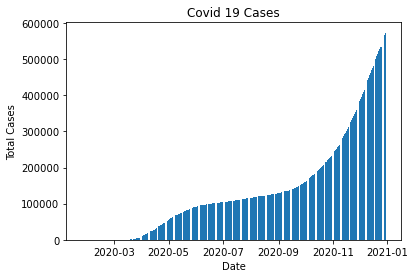

In [95]:
plt.bar('Date','TotalCases',data=covid_data)
plt.title('Covid 19 Cases')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.show()

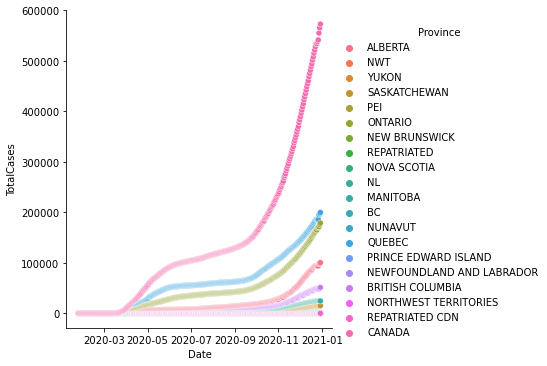

In [87]:
sns.relplot(x='Date',y='TotalCases',hue='Province',data=covid_data)

In [88]:
# the overall cases in canada have rapidly increased from september 2020 onwards. 
# We can also see a provincial wise increase in cases

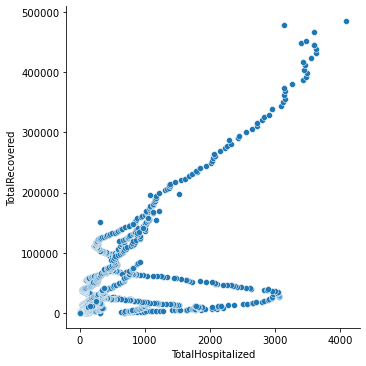

In [112]:
sns.relplot(x='TotalHospitalized',y='TotalRecovered',data=covid_data)

In [98]:
# as there is an increase in cases, the number of people recovered also seem to be increasng.

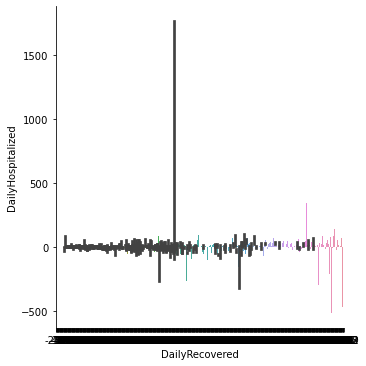

In [113]:
sns.catplot(y='DailyHospitalized', x='DailyRecovered',data=covid_data, kind='bar')

Remove outliers which are in negative.
remove null values with dropna.
Replace few null values with some other values.
Remove initial cases in march since there are not many i.e intial records based on a condition.
Do linear regression to predict future cases.